In [8]:
%config IPCompleter.greedy=True

# Reconocimiento de dígitos con KNN

Definir los path al ejecutable de python 3.6 y sus librerías,
de acuerdo al virtual env que estén corriendo.

In [16]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /usr/bin/python (found version "3.6.9") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.6m.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/zarthaxx/Desktop/metnum-tp2
CMake Warning (dev) at CMakeLists.txt:58 (add_executable):

In [2]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum


/home/zarthaxx/Desktop/metnum-tp2/notebooks
Python 3.6.9


In [3]:
import pandas as pd

df = pd.DataFrame({'epsilon': pd.Series([], dtype='float'),
                   'time': pd.Series([], dtype='float'),
                   'error': pd.Series([], dtype='float')})

In [4]:
import numpy as np
import time

MATRIX_SZ = 28*28
N = 30
EPS = -1
EPS_N = 7

results = []
epsilons = [10 ** -(EPS+i) for i in range(1,EPS_N+1)]

diag = np.arange(MATRIX_SZ,0,step = -1)

diag_matrix = np.diag(diag)

diag_matrix

print("Diagonal\n", diag[:N])
for eps in epsilons:
    
    t = time.process_time()
    vals, vecs = metnum.get_first_eigenvalues(diag_matrix, N, epsilon=eps)
    elapsed_time = time.process_time() - t
    error = 1-np.sum(np.divide(vals, diag[:N]))/N
    #df.append({"epsilon": 1, "time": 2,"error": 3}, ignore_index=True)
    df = df.append({"epsilon" : eps, "time": elapsed_time, "error": error}, ignore_index=True)
    
    print(f"eps={eps} => [time=","{:.10f}".format(elapsed_time),"err=","{:.10f}".format(error),"]")
    print(vals)

Diagonal
 [784 783 782 781 780 779 778 777 776 775 774 773 772 771 770 769 768 767
 766 765 764 763 762 761 760 759 758 757 756 755]
eps=1 => [time= 2.7860430150 err= 0.6516315155 ]
[ 586.89742579  603.62451336  510.25690033  496.14766477  541.71935831
  414.90454523  260.09756471  100.6117752    65.38837376   29.08550561
   12.11674724    5.59597784 -780.44657948  307.20655825  562.25074076
  530.26903271  494.56874311  417.3791778   269.57280874  144.80402762
   84.93781612   57.92543551    5.63952927 -777.58619556  506.65554861
  539.79403234  439.59141224  458.56015704  640.24573338  519.75942078]
eps=0.1 => [time= 0.2504834400 err= 0.2073334416 ]
[652.13199882 546.97288983 593.30580497 580.65074724 569.69776458
 563.12601602 623.00893288 619.72515118 613.42240747 614.47510593
 612.80656761 609.68838004 618.66875214 608.86118793 615.97025416
 612.86805157 612.709765   623.1031322  610.81532957 616.89916185
 613.41156504 619.76968451 615.57390102 618.95595341 617.60261227
 620.09737

[None, None]

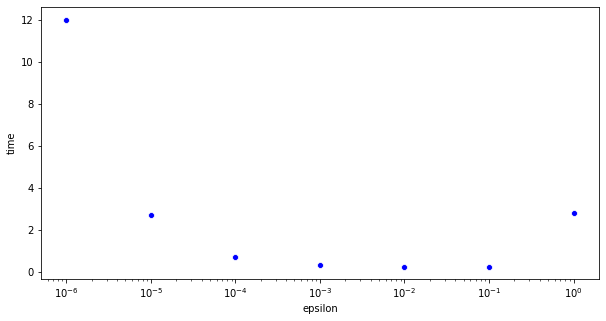

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

eps_time = sns.scatterplot(x="epsilon", y="time", data=df, marker="o", color="b")
eps_time.set(xscale="log", yscale="linear")

[None, None]

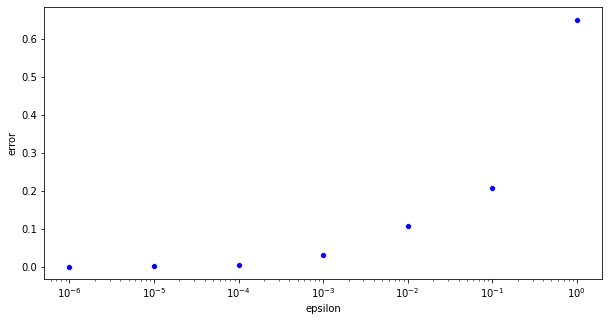

In [6]:

plt.figure(figsize=(10, 5))

eps_error = sns.scatterplot(x="epsilon", y="error", data=df, marker="o", color="b")
eps_error.set(xscale="log", yscale="linear")
